In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import glob
import re


In [2]:
# beige_color = (255/255,253/255,250/255)
beige_color = '#FFFDFA'

# sns.set_theme(style="ticks", rc={'figure.facecolor': beige_color, 'axes.facecolor' : beige_color})
sns.set_theme(style="ticks")
# sns.set_context("talk")
# sns.set_context("poster")


In [3]:
path = "results/linear_multi"
# path = "results/linear_multi/N500"
# path = "results/nonlinear_multi"
# path = "results/nonlinear_multi/trunc_parab"
all_file = glob.glob(path + "/*.csv")
print(all_file)

['results/linear_multi\\linear_dgp_svi_1.csv', 'results/linear_multi\\linear_dgp_svi_10.csv', 'results/linear_multi\\linear_dgp_svi_11.csv', 'results/linear_multi\\linear_dgp_svi_12.csv', 'results/linear_multi\\linear_dgp_svi_13.csv', 'results/linear_multi\\linear_dgp_svi_14.csv', 'results/linear_multi\\linear_dgp_svi_15.csv', 'results/linear_multi\\linear_dgp_svi_16.csv', 'results/linear_multi\\linear_dgp_svi_17.csv', 'results/linear_multi\\linear_dgp_svi_18.csv', 'results/linear_multi\\linear_dgp_svi_19.csv', 'results/linear_multi\\linear_dgp_svi_2.csv', 'results/linear_multi\\linear_dgp_svi_20.csv', 'results/linear_multi\\linear_dgp_svi_21.csv', 'results/linear_multi\\linear_dgp_svi_22.csv', 'results/linear_multi\\linear_dgp_svi_23.csv', 'results/linear_multi\\linear_dgp_svi_24.csv', 'results/linear_multi\\linear_dgp_svi_25.csv', 'results/linear_multi\\linear_dgp_svi_26.csv', 'results/linear_multi\\linear_dgp_svi_27.csv', 'results/linear_multi\\linear_dgp_svi_28.csv', 'results/linea

In [4]:
extracted_numbers = [re.findall(r'\d+', s) for s in all_file]
first_numbers = [int(numbers[0]) if numbers else None for numbers in extracted_numbers]
first_numbers.sort()
first_numbers

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50]

In [30]:
lin_dfs = [pd.read_csv(f) for f in all_file]
combined_df = pd.concat(lin_dfs)
combined_df[['model', 'type']] = combined_df['method'].str.split('_', expand=True)
print(combined_df)

       idx   mean median   true   bias    std   RMSE RMSE_all    MAE MAE_all  \
0      1.0  2.529  2.529  2.513  0.016  0.059   0.11    0.162  0.091   0.125   
1      1.0  2.448  2.449  2.513 -0.065  0.076  0.314    0.415  0.232   0.287   
2      1.0  3.254  3.254  3.235  0.019  0.074  0.086    0.143  0.063   0.101   
3      1.0  3.141  3.141  3.235 -0.094  0.092  0.387     0.48  0.192   0.255   
4      1.0  1.779  1.779  2.513 -0.734  0.067  1.206    1.214  0.914    0.92   
..     ...    ...    ...    ...    ...    ...    ...      ...    ...     ...   
155  504.0  2.678  2.678  3.074 -0.396  0.092  0.874    0.965  0.608   0.676   
156  504.0  2.522  2.521  2.545 -0.023  0.056  0.488    0.502  0.386   0.396   
157  504.0  2.472  2.472  2.545 -0.073  0.079  0.657    0.709  0.447   0.482   
158  504.0  2.994  2.993  3.074  -0.08   0.07  0.522    0.533  0.414   0.422   
159  504.0  2.883  2.883  3.074 -0.191  0.091  0.776    0.819  0.509   0.531   

      MAPE   q025   q975 covering mean_

In [35]:
combined_df[['bias','median','true','mean','std','RMSE','RMSE_all','MAE', 'MAE_all','MAPE', 'q025','q975','covering','mean_ind_cover']] = combined_df[['bias','median','true','mean','std','RMSE','RMSE_all','MAE', 'MAE_all','MAPE', 'q025','q975','covering', 'mean_ind_cover']].apply(pd.to_numeric, errors='coerce')

In [36]:
# combined_df = combined_df.apply(pd.to_numeric, errors='coerce')


combined_df['type'] = combined_df['type'].replace('observed',"Obs.")
combined_df['type'] = combined_df['type'].replace('oracle',"Oracle")
combined_df['type'] = combined_df['type'].replace('plugin',"Plugin")
combined_df['abs_bias'] = np.abs(combined_df['bias'])
combined_df['ci_length'] = combined_df['q975'] - combined_df['q025']
combined_df['MAPE_manual'] = np.abs((combined_df['mean']-combined_df['TRUE'])/combined_df['TRUE'])

# combined_df.to_csv("results/linear_dgp_N300.csv")


In [37]:
combined_df[combined_df["estimand"]=="dynamic"]

,idx,mean,median,true,bias,std,RMSE,RMSE_all,MAE,MAE_all,...,covering,mean_ind_cover,method,estimand,TRUE,model,type,abs_bias,ci_length,MAPE_manual
0,1.0,2.529,2.529,2.513,0.016,0.059,0.110,0.162,0.091,0.125,...,1.0,0.994,Linear_oracle,dynamic,NaN,Linear,Oracle,0.016,0.235,NaN
1,1.0,2.448,2.449,2.513,-0.065,0.076,0.314,0.415,0.232,0.287,...,1.0,0.916,GP_oracle,dynamic,NaN,GP,Oracle,0.065,0.298,NaN
4,1.0,1.779,1.779,2.513,-0.734,0.067,1.206,1.214,0.914,0.920,...,0.0,0.152,Linear_observed,dynamic,NaN,Linear,Obs.,0.734,0.262,NaN
5,1.0,1.285,1.283,2.513,-1.228,0.163,1.799,1.835,1.413,1.444,...,0.0,0.296,GP_observed,dynamic,NaN,GP,Obs.,1.228,0.639,NaN
8,1.0,2.376,2.374,2.513,-0.137,0.096,0.583,0.756,0.465,0.601,...,1.0,0.898,Linear_3S,dynamic,NaN,Linear,3S,0.137,0.375,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,504.0,1.690,1.689,2.545,-0.855,0.169,1.510,1.553,1.166,1.188,...,0.0,0.304,GP_observed,dynamic,NaN,GP,Obs.,0.855,0.662,NaN
152,504.0,2.415,2.414,2.545,-0.130,0.070,0.583,0.667,0.445,0.514,...,1.0,0.728,Linear_3S,dynamic,NaN,Linear,3S,0.130,0.275,NaN
154,504.0,2.333,2.332,2.545,-0.212,0.088,0.747,0.849,0.518,0.597,...,0.0,0.794,GP_3S,dynamic,NaN,GP,3S,0.212,0.342,NaN
156,504.0,2.522,2.521,2.545,-0.023,0.056,0.488,0.502,0.386,0.396,...,1.0,0.320,Linear_1S,dynamic,NaN,Linear,1S,0.023,0.221,NaN


In [38]:
# print dtype of each column 
print(combined_df.dtypes)

idx                object
mean              float64
median            float64
true              float64
bias              float64
std               float64
RMSE              float64
RMSE_all          float64
MAE               float64
MAE_all           float64
MAPE              float64
q025              float64
q975              float64
covering          float64
mean_ind_cover    float64
method             object
estimand           object
TRUE              float64
model              object
type               object
abs_bias          float64
ci_length         float64
MAPE_manual       float64
dtype: object


In [41]:
def coverage_perc(x):
    return np.mean(x)*100

# df_summary = combined_df.groupby(["estimand", "model", "type"]).agg(
df_summary = combined_df.groupby(["estimand", "model", "type"]).agg(
                                        {'mean' : ['mean'],
                                         'median' : ['mean'],
                                         'std' : ['mean'],
                                         'bias' : ['median'],
                                         'TRUE' : ['mean'],
                                         'RMSE' : ['median'],
                                         'RMSE_all' : ['median'],
                                         'MAE' : ['median'],
                                         'MAE_all' : ['median'],
                                         'MAPE' : ['median'],
                                         # 'MAPE_manual' : ['mean'],
                                         'q025' : ['median'],
                                         'q975' : ['median'],
                                         'ci_length' : ['median'],
                                         'covering' : [coverage_perc],
                                         'mean_ind_cover' : ['median']}).reset_index()
                                         # 'true_included99' : [coverage_perc]})
                                         # 'true_included95' : ['mean'],
                                         # 'true_included99' : ['mean']})

df_summary


,estimand,model,type,mean,median,std,bias,TRUE,RMSE,RMSE_all,MAE,MAE_all,MAPE,q025,q975,ci_length,covering,mean_ind_cover
,,,,mean,mean,mean,median,mean,median,median,median,median,median,median,median,median,coverage_perc,median
0,dynamic,GP,1S,2.392090,2.394235,0.163855,-0.0175,2.689773,0.6740,0.7305,0.4860,0.5200,1.2215,2.5275,2.8350,0.3100,84.649123,0.524
1,dynamic,GP,3S,2.358765,2.362987,0.177857,-0.1540,2.689773,0.7390,0.8735,0.5380,0.6455,1.2405,2.3730,2.7300,0.3635,62.938596,0.822
2,dynamic,GP,Obs.,1.907910,1.908066,0.160355,-0.7855,2.689773,1.5465,1.5860,1.1970,1.2215,3.4515,1.6035,2.2210,0.6050,1.096491,0.310
3,dynamic,GP,Oracle,2.667057,2.667121,0.066026,-0.0315,2.689773,0.3710,0.4430,0.1900,0.2515,0.3480,2.5455,2.7940,0.2560,90.570175,0.958
4,dynamic,Linear,1S,2.565581,2.565599,0.083399,0.0170,2.689773,0.5265,0.5400,0.4200,0.4295,1.1280,2.5885,2.8155,0.2280,76.535088,0.315
5,dynamic,Linear,3S,2.478875,2.475779,0.106816,-0.0945,2.689773,0.6040,0.7210,0.4740,0.5660,1.1695,2.4520,2.7465,0.2970,69.956140,0.790
6,dynamic,Linear,Obs.,2.277053,2.276895,0.065136,-0.4175,2.689773,1.0605,1.0675,0.7690,0.7750,1.2695,2.1570,2.4120,0.2540,1.096491,0.214
7,dynamic,Linear,Oracle,2.697327,2.697160,0.050092,-0.0030,2.689773,0.0950,0.1430,0.0770,0.1090,0.1865,2.6010,2.7915,0.1945,93.640351,1.000
8,stoch,GP,1S,2.887638,2.891575,0.193844,-0.0500,3.202855,0.7680,0.8190,0.5325,0.5575,0.3585,2.9875,3.3260,0.3490,83.114035,0.434


Text(0, 0.5, '')

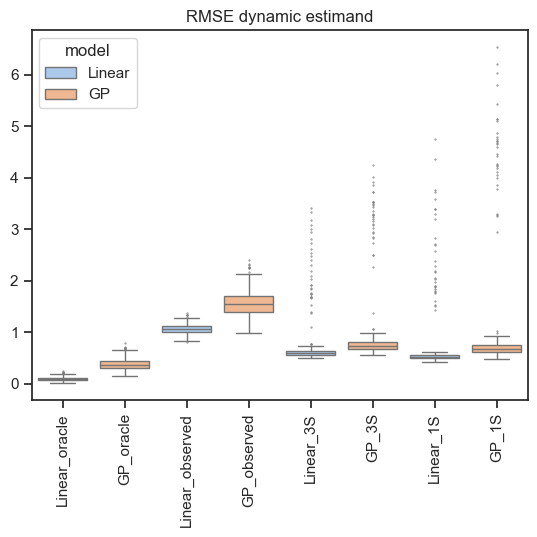

In [44]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=1,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'RMSE',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "model", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("RMSE dynamic estimand")
# plt.ylim(0,.5)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")
# sns.despine()

Text(0, 0.5, '')

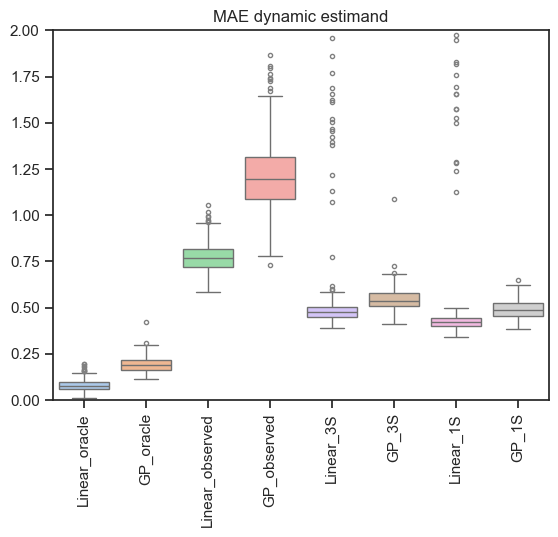

In [45]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'MAE',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("MAE dynamic estimand")
plt.ylim(0,2)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")

Text(0, 0.5, '')

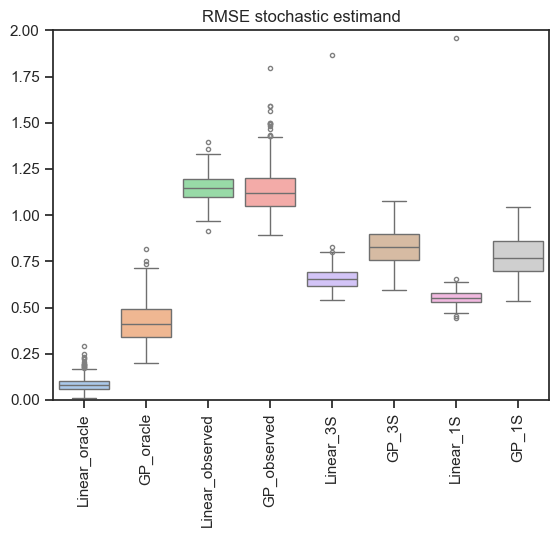

In [47]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'RMSE',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("RMSE stochastic estimand")
plt.ylim(0,2)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")

Text(0, 0.5, '')

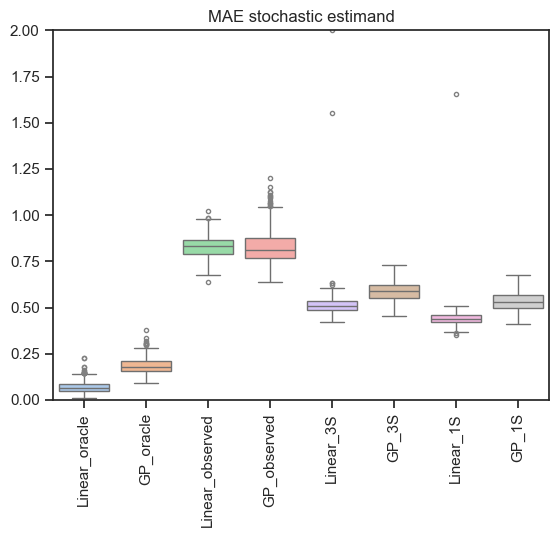

In [49]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'MAE',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("MAE stochastic estimand")
plt.ylim(0,2)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")

Text(0, 0.5, '')

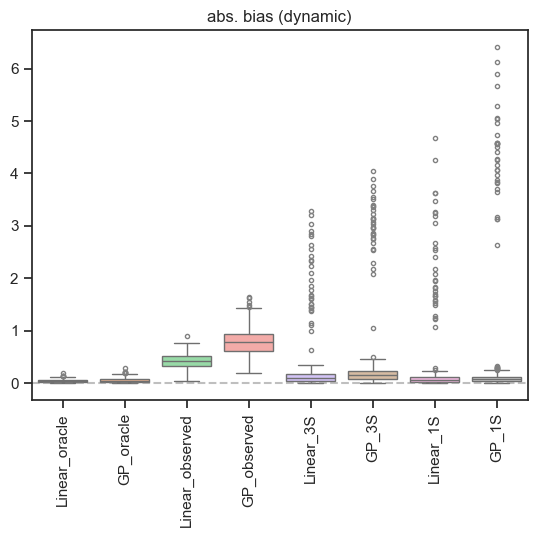

In [50]:
box_bias = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'abs_bias',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_bias.set_title("abs. bias (dynamic)")
# plt.ylim(0,.5)
plt.xticks(rotation=90)
box_bias.set_xlabel("")
box_bias.set_ylabel("")

Text(0, 0.5, '')

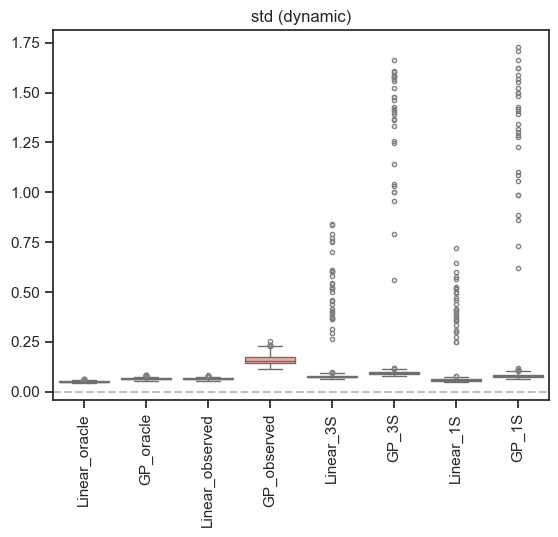

In [51]:
box_std = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'std',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_std.set_title("std (dynamic)")
# plt.ylim(0,.2)
plt.xticks(rotation=90)
box_std.set_xlabel("")
box_std.set_ylabel("")

Text(0, 0.5, '')

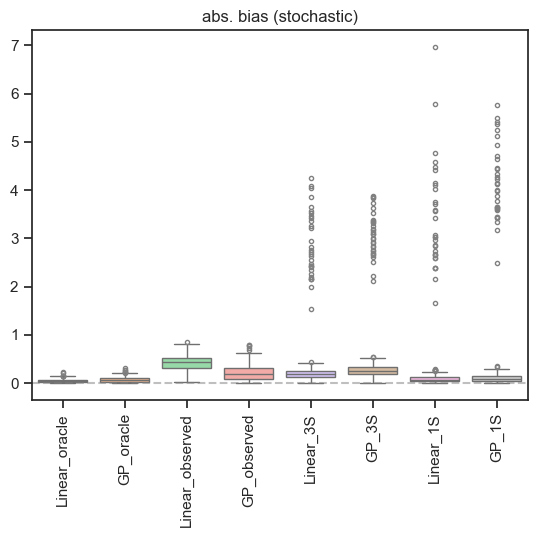

In [52]:
box_bias = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'abs_bias',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_bias.set_title("abs. bias (stochastic)")
# plt.ylim(0,.25)
plt.xticks(rotation=90)
box_bias.set_xlabel("")
box_bias.set_ylabel("")

Text(0, 0.5, '')

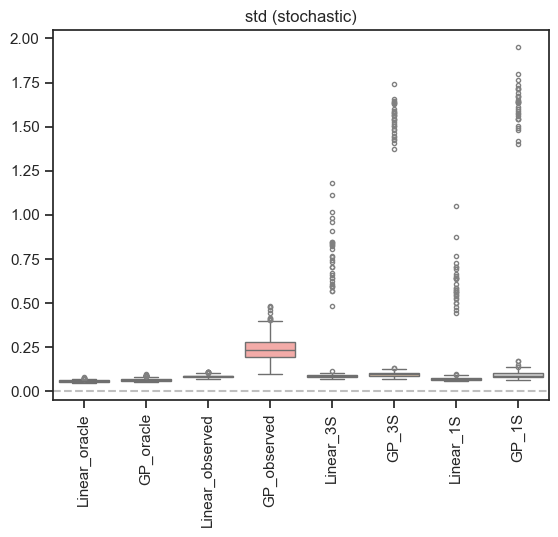

In [53]:
box_std = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'std',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_std.set_title("std (stochastic)")
# plt.ylim(0,.1)
plt.xticks(rotation=90)
box_std.set_xlabel("")
box_std.set_ylabel("")

In [58]:
def format_percentage(value, x=1):
    return f"{value*x:.1f}%"

df_summary_dynamic = df_summary[df_summary["estimand"]=="dynamic"]
# df_summary_dynamic = df_summary[df_summary["estimand"]=="stoch"]
df_summary_dynamic.columns = df_summary_dynamic.columns.droplevel(1)
df_summary_dynamic["coverage"] = df_summary_dynamic["covering"].apply(format_percentage)
df_summary_dynamic["mean_ind_cover"] = df_summary_dynamic["mean_ind_cover"].apply(format_percentage, x=100)
print(df_summary_dynamic)

combined_df_dynamic = combined_df[combined_df["estimand"]=="dynamic"]
# combined_df_dynamic = combined_df[combined_df["estimand"]=="stoch"]
# print(combined_df_dynamic)

  estimand   model    type      mean    median       std    bias      TRUE  \
0  dynamic      GP      1S  2.392090  2.394235  0.163855 -0.0175  2.689773   
1  dynamic      GP      3S  2.358765  2.362987  0.177857 -0.1540  2.689773   
2  dynamic      GP    Obs.  1.907910  1.908066  0.160355 -0.7855  2.689773   
3  dynamic      GP  Oracle  2.667057  2.667121  0.066026 -0.0315  2.689773   
4  dynamic  Linear      1S  2.565581  2.565599  0.083399  0.0170  2.689773   
5  dynamic  Linear      3S  2.478875  2.475779  0.106816 -0.0945  2.689773   
6  dynamic  Linear    Obs.  2.277053  2.276895  0.065136 -0.4175  2.689773   
7  dynamic  Linear  Oracle  2.697327  2.697160  0.050092 -0.0030  2.689773   

     RMSE  RMSE_all    MAE  MAE_all    MAPE    q025    q975  ci_length  \
0  0.6740    0.7305  0.486   0.5200  1.2215  2.5275  2.8350     0.3100   
1  0.7390    0.8735  0.538   0.6455  1.2405  2.3730  2.7300     0.3635   
2  1.5465    1.5860  1.197   1.2215  3.4515  1.6035  2.2210     0.6050   
3

C:\Users\bar21\AppData\Local\Temp\ipykernel_22668\2229529795.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summary_dynamic["coverage"] = df_summary_dynamic["covering"].apply(format_percentage)
C:\Users\bar21\AppData\Local\Temp\ipykernel_22668\2229529795.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summary_dynamic["mean_ind_cover"] = df_summary_dynamic["mean_ind_cover"].apply(format_percentage, x=100)


In [59]:
df_summary_dynamic['model_type'] = df_summary_dynamic[['model', 'type']].apply(lambda x: '_'.join(x), axis=1)

print(df_summary_dynamic)


  estimand   model    type      mean    median       std    bias      TRUE  \
0  dynamic      GP      1S  2.392090  2.394235  0.163855 -0.0175  2.689773   
1  dynamic      GP      3S  2.358765  2.362987  0.177857 -0.1540  2.689773   
2  dynamic      GP    Obs.  1.907910  1.908066  0.160355 -0.7855  2.689773   
3  dynamic      GP  Oracle  2.667057  2.667121  0.066026 -0.0315  2.689773   
4  dynamic  Linear      1S  2.565581  2.565599  0.083399  0.0170  2.689773   
5  dynamic  Linear      3S  2.478875  2.475779  0.106816 -0.0945  2.689773   
6  dynamic  Linear    Obs.  2.277053  2.276895  0.065136 -0.4175  2.689773   
7  dynamic  Linear  Oracle  2.697327  2.697160  0.050092 -0.0030  2.689773   

     RMSE  RMSE_all    MAE  MAE_all    MAPE    q025    q975  ci_length  \
0  0.6740    0.7305  0.486   0.5200  1.2215  2.5275  2.8350     0.3100   
1  0.7390    0.8735  0.538   0.6455  1.2405  2.3730  2.7300     0.3635   
2  1.5465    1.5860  1.197   1.2215  3.4515  1.6035  2.2210     0.6050   
3

C:\Users\bar21\AppData\Local\Temp\ipykernel_22668\2384414092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summary_dynamic['model_type'] = df_summary_dynamic[['model', 'type']].apply(lambda x: '_'.join(x), axis=1)


In [61]:
df_summary_dynamic["true"]

0    2.689773
1    2.689773
2    2.689773
3    2.689773
4    2.689773
5    2.689773
6    2.689773
7    2.689773
Name: TRUE, dtype: float64

C:\Users\bar21\AppData\Local\Temp\ipykernel_22668\3814381486.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summary_dynamic['categ_pos'] = df_summary_dynamic['model_type'].map(categ_pos)


ValueError: 'xerr' must not contain negative values

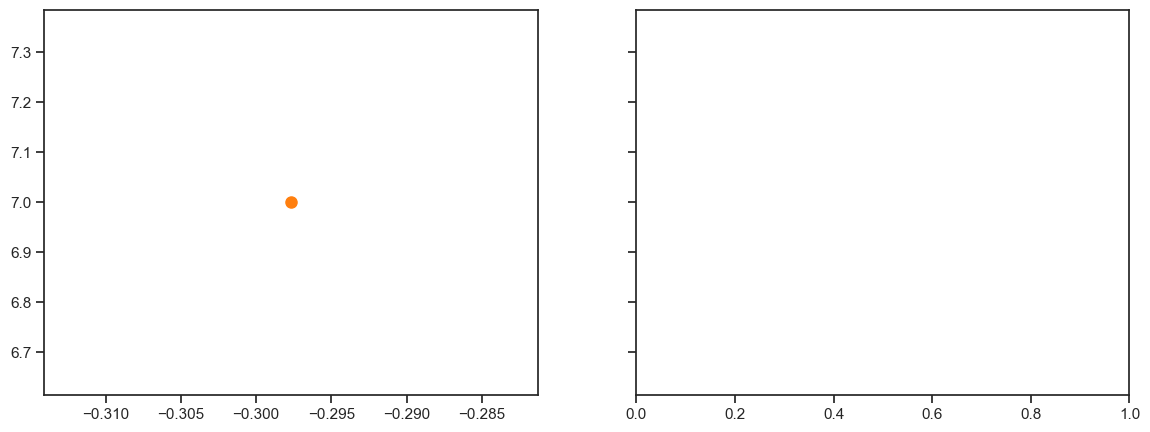

In [63]:
# Plot points with error bars
categories = np.arange(len(df_summary_dynamic['model_type']))
category_labels = df_summary_dynamic['model_type'].unique()

# Create a dictionary to map category positions

# Map categ to positions
model_names = ['True', 'Observed', 'Multi-stage', 'Plug-in']
model_order = ['Linear_Oracle', 'GP_Oracle', 'Linear_Obs.', 'GP_Obs.',
               'Linear_3S', 'GP_3S', 'Linear_1S', 'GP_1S']
categ_pos = {category: pos for pos, category in enumerate(model_order)}
df_summary_dynamic['categ_pos'] = df_summary_dynamic['model_type'].map(categ_pos)
# combined_df_dynamic['categ_pos'] = combined_df_dynamic['model_type'].map(categ_pos)

# Assign colors to categ2
unique_categ2 = df_summary_dynamic['model']
# colors = plt.cm.tab10(np.linspace(0, 1, len(unique_categ2)))
color_map = { "GP" : "tab:orange", "Linear" : "tab:blue"}
# color_map = dict(zip(unique_categ2, colors))

# Plotting
plt.style.use('seaborn-v0_8-colorblind')
# plt.style.use('fast')

fig, axs = plt.subplots(1, 2, figsize=(14, 5),
                        gridspec_kw={'width_ratios': [1, 1]}, sharey=True)
# for ax in axs:
#     ax.set_facecolor('white')
# Plot points with different colors based on categ2
for categ2 in unique_categ2:
    subset = df_summary_dynamic[df_summary_dynamic['type'] == categ2]
    axs[0].scatter(subset['mean'],
                subset['categ_pos'],
                label=f'{categ2}', color=color_map[categ2], s=650)


for i, row in df_summary_dynamic.iterrows():
    axs[0].errorbar(
        row['mean'] - row['true'], 
        row['categ_pos'], 
        xerr=[[row['mean'] - row['q025']],
              [row['q975'] - row['mean']]], 
        fmt='o', 
        # color='black', 
        color = color_map[row['model']], 
        ecolor = color_map[row['model']], 
        # ecolor='black', 
        capsize=5, markersize = 8   
    )
    
    axs[0].annotate(
                    # row['mean_ind_cover'], 
                    row['coverage'], 
                    xy=(row['mean'] - row['true'], row['categ_pos']), 
                    xytext=(0, 13), 
                    textcoords='offset points', 
                    ha='center', 
                    va='top',
                    fontsize=10, 
                    color='black')    

# Customize the x-axis to show category labels
axs[0].set_yticks(np.arange(0.5,len(model_order),2))
# axs[0].set_yticklabels(model_order)
axs[0].set_yticklabels(model_names, fontsize=14, fontweight='bold')
axs[0].set_ylim(-1, len(model_order) - 0.5)
# axs[0].axvline(df_summary_dynamic["true"][0], color='grey', linestyle='--', alpha=0.5)
axs[0].axvline(0, color='black', linestyle='--', alpha=0.3)
axs[0].set_title('Coverage & Mean error (95% CI)', fontsize=16, fontweight='bold')
# axs[0].grid(True)


flierprops = dict(marker='.', markerfacecolor='None', markersize=3,  markeredgecolor='grey')
sns.boxplot(
    data=combined_df_dynamic, 
    # x='MAE', 
    x='RMSE', 
    # x='MAPE', 
    y='method', 
    hue="model", 
    palette=color_map, 
    ax=axs[1],
    flierprops=flierprops
)

axs[1].set_yticks(np.arange(0.5,len(model_order),2))
axs[1].set_ylim(-1, len(model_order) - 0.5)
# axs[1].set_yticklabels([])
axs[1].set_xlabel('')
axs[1].set_ylabel('')
axs[1].set_title('RMSE', fontsize=18, fontweight='bold')
handles, labels = axs[1].get_legend_handles_labels()
ordered_handles = [handles[1], handles[0]]  # Reorder legend
ordered_labels = [labels[1], labels[0]]  # Reorder labels
axs[1].legend(ordered_handles, ordered_labels, title='', loc='upper right', 
              fontsize=13)
# axs[1].grid(True)
plt.tight_layout()
# plt.style.use('seaborn-whitegrid')
axs[0].tick_params(axis='x', labelsize=12)
axs[1].tick_params(axis='x', labelsize=12)


# plt.savefig('results/figs/nonlin_truncated_parab.png', dpi = 1000)           # Save as PNG file
plt.show()
